In [1]:
import numpy as np
import pandas as pd 

from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv(r'./cdata.csv')
df.head()

,x,y,cluster
0,2.1364,0.8369,1
1,7.4096,-1.4137,3
2,5.0996,1.1552,0
3,7.8149,-1.0186,3
4,1.8925,1.2714,1


In [3]:
class KMeansClassifier:

    def __init__(self, K, max_iter=100) -> None:
        
        # K cluster
        self.K = K
        # maximum iterations
        self.max_iter = max_iter

    def fit_transform(self, X: np.ndarray, show: bool = False) -> np.ndarray:
        
        # K initial data point were selected
        centers = X[np.random.choice(len(X), self.K)]

        # empty cluster array
        clusters = np.zeros(shape=len(X))
        
        for n_iter in range(self.max_iter):

            # calculate distance to each center
            distance = np.array([ np.square(X[:,0]-center[0]) + np.square(X[:,1]-center[1]) for center in centers])

            # select cloest one
            temp = np.argmin(distance, axis=0)

            # Redo the above if cluster still change
            if not np.equal(clusters, temp).all():
                clusters = temp
                centers = np.array( [np.mean(X[clusters==i], axis=0) for i in np.arange(self.K) if X[clusters==i].any()] )

                # plot the result
                if show:
                    plt.figure()
                    plt.plot(centers[:,0], centers[:,1], 'kx', markersize=10, label='Central')
                    for i, c in enumerate(['A', 'B', 'C', 'D']):
                        plt.scatter(X[clusters==i][:,0], X[clusters==i][:,1], label=c)
                    plt.legend()
                    plt.show()

            else:
                # print('result converge without reaching max_iter at n={} iters'.format(n_iter))
                break

        return clusters


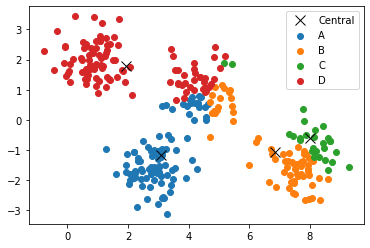

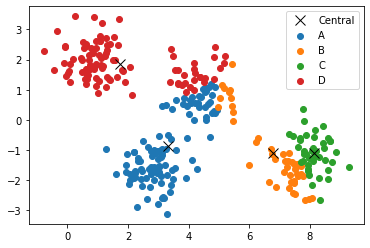

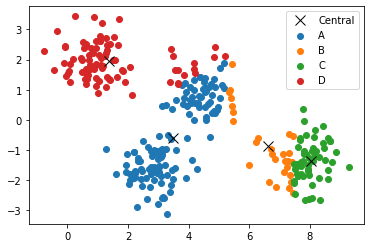

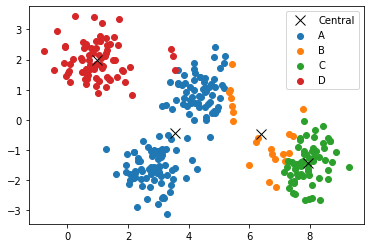

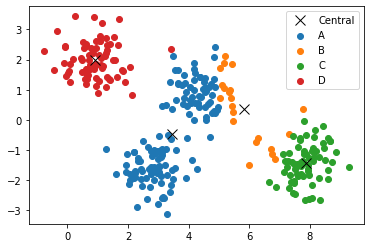

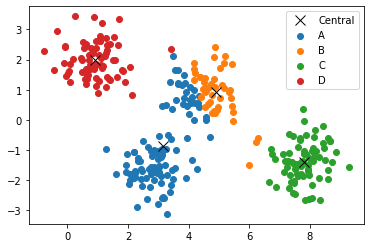

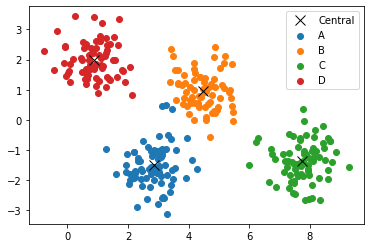

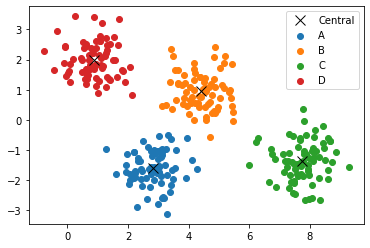

In [4]:
X = df[['x', 'y']].to_numpy()
y = df['cluster'].shape
cs = KMeansClassifier(K=4).fit_transform(X, show=True)

C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


Text(0, 0.5, 'SSE')

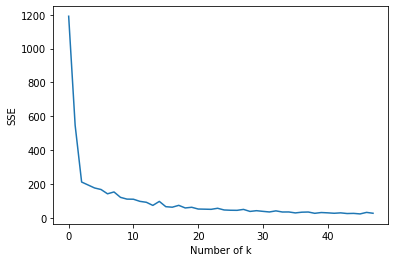

In [5]:
def SSE(y_true: np.ndarray, y_test: np.ndarray):
    return np.sum(np.sum(np.square(X-f(cs)), axis=1))

e = []
# run from k=2 to k=49
for k in np.arange(2, 50):

    cs = KMeansClassifier(K=k).fit_transform(X)
    centers = np.array( [np.mean(X[cs==i], axis=0) for i in range(k)] )
    f = lambda x: centers[x, :]
    e.append(SSE(X, f(cs)))
plt.plot(e)
plt.xlabel('Number of k')
plt.ylabel('SSE')

(100.0, 150.0)

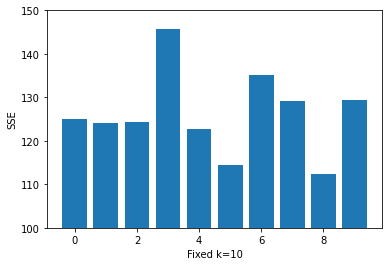

In [6]:
e = []
k = 10
# 10 time random initialize and plot sse
for i in range(10):
    cs = KMeansClassifier(K=k).fit_transform(X)
    centers = np.array( [np.mean(X[cs==i], axis=0) for i in range(k)] )
    f = lambda x: centers[x, :]
    e.append(SSE(X, f(cs)))

plt.bar(np.arange(10), e)
plt.ylabel('SSE')
plt.xlabel('Fixed k=10')

plt.ylim([100, 150])